# Advanced Statistics for Quantitative Trading
<div class="alert alert-info"><strong>Part I : Statistical analysis of financial market data</strong></div>

#### Notebook Created on: 20 June 2020
##### Last Update: 28 Jun 2022
##### Version 1.6
##### Author: Vivek Krishnamoorthy

## **Agenda for today**
- Time series modeling - A preview before the lectures (the document)
- Transforming prices to returns
- Visualizing the data
- Calculating realized volatility
- Detecting outliers
- Verifying the stylized facts of asset returns
- Anatomy of a time series process

I adapt and use some of the material from [Eryk Lewinson](#eryk), the [ARCH documentation](#arch), and [other sources](#others) mentioned.

<a id = 'convert'></a>

### A simple technique to stationarize: Transforming prices to returns

Asset prices are usually non-stationary. We try to make it stationary by dealing with its returns instead. This can be either simple returns or log returns. For daily or intraday returns, the difference between simple returns and log returns is very small. As the time scale increases, this difference grows in size. Log returns are always lesser than the corresponding simple returns.

We now calculate both types of returns for `GLENMARK` prices.

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

In [4]:
end1 = datetime.date(2022, 6, 28)
start1 = datetime.date(2005, 7, 1)
ticker1 = "GLENMARK.NS"

In [5]:
df = yf.download(ticker1, start=start1, end=end1, progress=False)
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker1} data")

Downloaded 4190 rows and 6 columns of GLENMARK.NS data


In [6]:
df1 = df.copy()

In [7]:
print(df1.head(3))
print(df1.tail(3))

              Open       High        Low      Close  Adj Close   Volume
Date                                                                   
2005-07-01  66.875  71.750000  66.875000  71.000000  67.483749  1596814
2005-07-04  71.000  72.974998  71.000000  72.762497  69.158974   999094
2005-07-05  73.125  74.974998  71.550003  72.474998  68.885719  1425164
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-06-23  361.049988  379.149994  351.500000  376.899994  376.899994   
2022-06-24  376.899994  385.750000  374.500000  384.149994  384.149994   
2022-06-27  385.299988  391.399994  384.299988  385.799988  385.799988   

             Volume  
Date                 
2022-06-23  3054392  
2022-06-24   912162  
2022-06-27   435249  


In [8]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")
# df1.to_csv("GLENMARK.NS.csv")
# df1 = pd.read_csv("GLENMARK.NS", index_col=0, parse_dates=True)
# df1 = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True, date_parser=mydateparser)

In [9]:
df1.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)
df1.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
print(df1.tail())

             adj_close
Date                  
2022-06-21  372.600006
2022-06-22  367.350006
2022-06-23  376.899994
2022-06-24  384.149994
2022-06-27  385.799988


In [10]:
df1['simple_returns'] = df1['adj_close'].pct_change()
df1['log_returns'] = np.log(df1['adj_close'] / df1['adj_close'].shift(1))

In [11]:
print(df1.head())
print(df1.tail())

            adj_close  simple_returns  log_returns
Date                                              
2005-07-01  67.483749             NaN          NaN
2005-07-04  69.158974        0.024824     0.024521
2005-07-05  68.885719       -0.003951    -0.003959
2005-07-06  69.646065        0.011038     0.010977
2005-07-07  68.493645       -0.016547    -0.016685
             adj_close  simple_returns  log_returns
Date                                               
2022-06-21  372.600006        0.057171     0.055597
2022-06-22  367.350006       -0.014090    -0.014190
2022-06-23  376.899994        0.025997     0.025665
2022-06-24  384.149994        0.019236     0.019053
2022-06-27  385.799988        0.004295     0.004286


### Visualizing the data

Because time series is sequential, plotting the data allows us to get an intuitive feel for how it fluctuates over time. It also helps us reason about features that could explain the variation we see.

In [12]:
%matplotlib inline

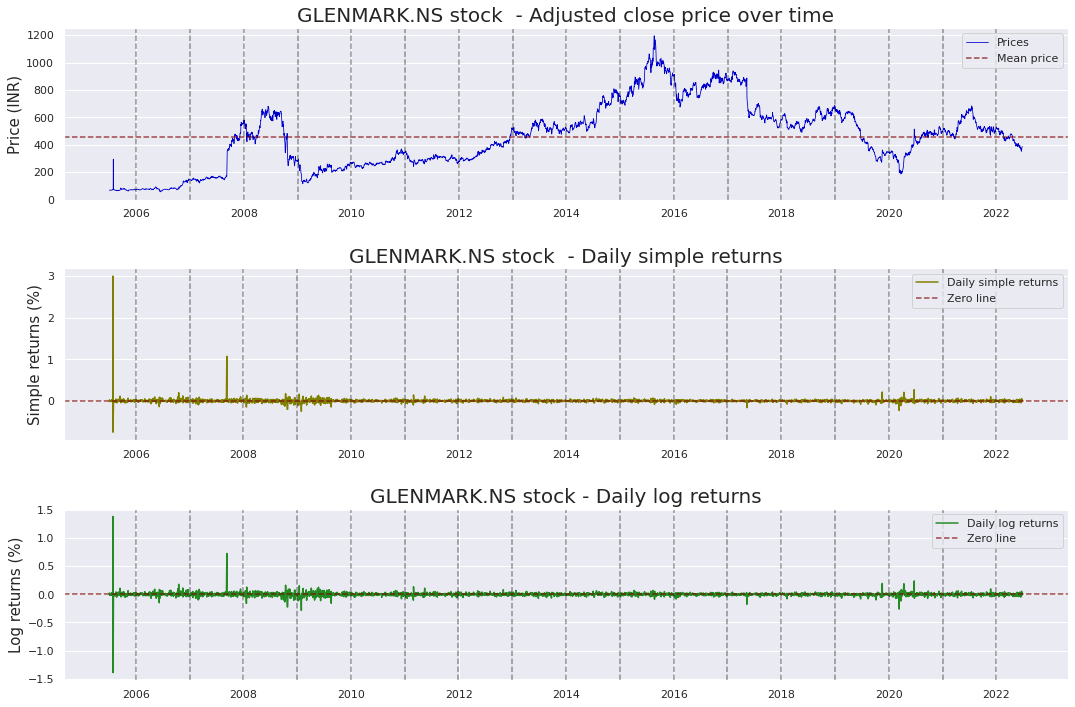

In [13]:
## Plotting the results together
M = 3
N = 1

fig, ax = plt.subplots(M, N, figsize=(18, 12))

ax[0].plot(df1['adj_close'], color='mediumblue', label='Prices', linewidth=0.8)
ax[0].set_title(f"{ticker1} stock  - Adjusted close price over time", fontsize=20)
ax[0].set_ylabel("Price (INR)", fontsize=15)

ax[1].plot(df1['simple_returns'], color='olive', label='Daily simple returns')
ax[1].set_title(f"{ticker1} stock  - Daily simple returns", fontsize=20)
ax[1].set_ylabel("Simple returns (%)", fontsize=15)

ax[2].plot(df1['log_returns'], color='forestgreen', label='Daily log returns')
ax[2].set_title(f"{ticker1} stock - Daily log returns", fontsize=20)
ax[2].set_ylabel("Log returns (%)", fontsize=15)


for i in range(3):
    for eachyear in range(start1.year,end1.year):
        ax[i].axvline(pd.to_datetime(str(eachyear)+'-12-31'), color='black', linestyle='--', alpha=0.4)

ax[0].axhline(df1['adj_close'].mean(), label='Mean price', color='maroon', linestyle='--', alpha=0.7)
ax[1].axhline(0, color='maroon', label='Zero line', linestyle='--', alpha=0.7)
ax[2].axhline(0, color='maroon', label='Zero line', linestyle='--', alpha=0.7)

# Legend addition
#ax[0].legend(['Prices', 'Mean price'], loc='best')
#ax[1].legend(['Daily simple returns', 'Zero line'], loc='best')
#ax[2].legend(['Daily log returns', 'Zero line'], loc='best')

ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')


# To set the spacing between subplots
plt.subplots_adjust(hspace=0.4)

Points to note:
- Similarity in the shapes of the simple returns and log returns. There is a difference in scale as we see from the Y-axis.
- Compare both return values (from the `pandas DataFrame`). What do you see?
- Plotting the price and the returns side by side allows us to observe the relationship between price and volatility in returns.

In [14]:
## ***********************************************************
## ***** EXPERIMENTAL : IGNORE THIS CELL *********************
## Trials with cufflinks and plotly
## ***********************************************************

## Using cufflinks and plotly

# import cufflinks as cf
# from plotly.offline import iplot, init_notebook_mode

# ## Config setup
# cf.set_config_file(world_readable=True, theme='polar',
#                    offline=True)

# init_notebook_mode()

## I needed to separately install chart_studio since iplot() is not displaying the chart
## Run the following on the Anaconda prompt or terminal
## pip install chart_studio
## conda install -c conda-forge nodejs
## conda update nodejs
## jupyterlab extension list
## conda install -c conda-forge jupyterlab-plotly-extension
# https://plotly.com/python/getting-started/#jupyterlab-support-python-35
# jupyter labextension install jupyterlab-plotly@4.8.2
# jupyter labextension list
# Still not working properly.

# df1.iplot(subplots=True, shape=(3, 1), shared_xaxes=True, 
#           title='GLENMARK adjusted close prices over time')

### Calculating realized volatility

Realized volatility calculates the magnitude of price movements of an asset over a specified time period. It's a commonly used risk measure.

We will now use the daily data to calculate monthly realized volatility (applying the [Barndorff-Nielsen & Shephard method](#bnshephard)) shown below.

1. Calculate the daily log returns
$$r_t = log (P_t) - log (P_{t-1})$$

2. Calculate the monthly realized variance by summing the squared returns for the `N` trading days of that month.
$$ \sum_{t=1}^N {r_t}^2$$

3. The monthly realized volatility is the square root of the above expression,

4. We annualize the value by multiplying the monthly realized volatility by $\sqrt{12}$.

Let's implement it in Python.

In [16]:
## Defining a function to calculate realized volatility

def realized_vol(x):
    return np.sqrt(np.sum(x ** 2))

In [17]:
## Calculating the monthly realized volatility

df1_real_vol = df1.groupby(pd.Grouper(freq='M'))[['log_returns']].apply(realized_vol)
# .apply would apply the function 'realized_vol' to the column selected (which would be 
# log returns for each month).
# Note that the function calculates the square root of the sum of squared returns for each month

In [18]:
df1_real_vol.rename(columns={'log_returns': 'realized_vol'}, inplace=True)

In [19]:
df1_real_vol.head()

,realized_vol
Date,
2005-07-31,1.964255
2005-08-31,0.103589
2005-09-30,0.156556
2005-10-31,0.110336
2005-11-30,0.098358


In [20]:
df1_real_vol.tail()

,realized_vol
Date,
2022-02-28,0.109470
2022-03-31,0.072063
2022-04-30,0.068979
2022-05-31,0.105351
2022-06-30,0.110403


In [21]:
## Calculating the annualized volatility


df1_real_vol['realized_vol'] = df1_real_vol['realized_vol'] * np.sqrt(12)

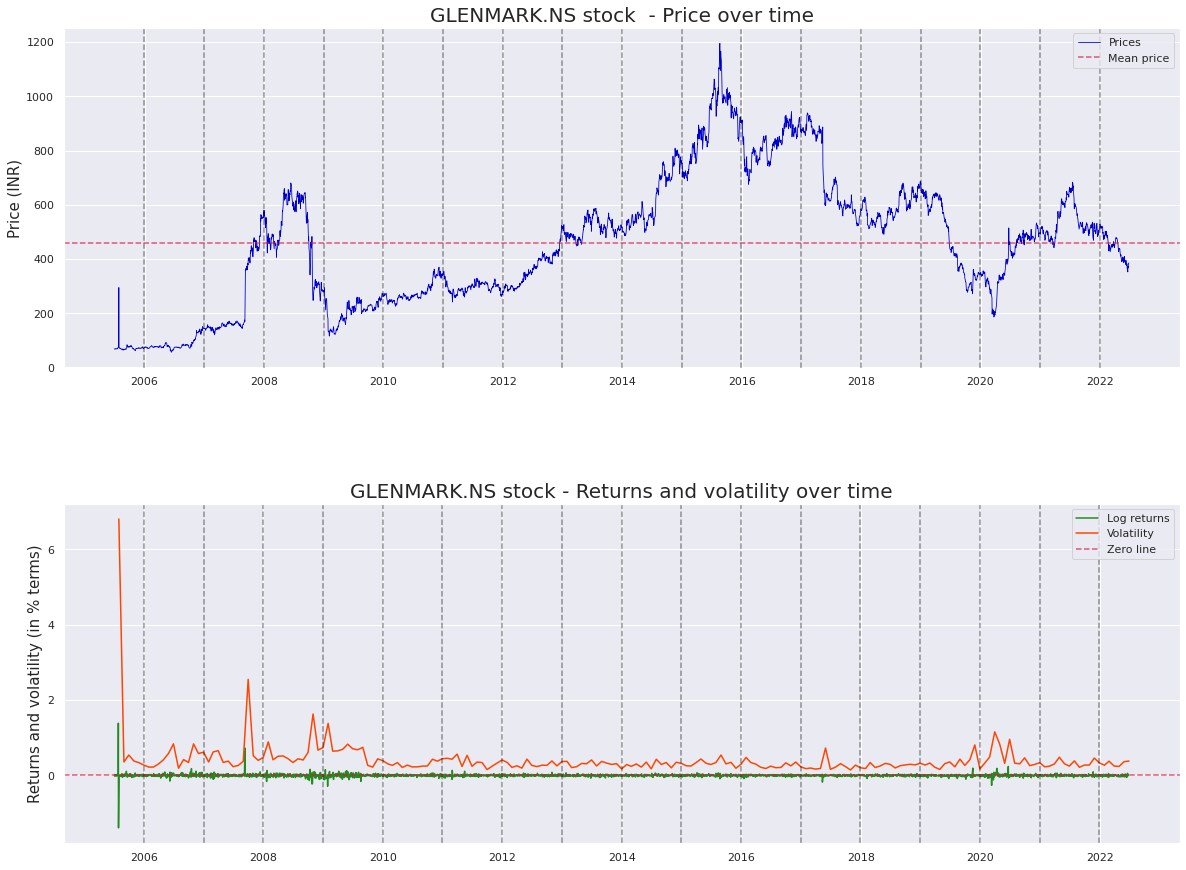

In [22]:
## Plotting the results together
M = 2
N = 1

fig, ax = plt.subplots(M, N, figsize=(20, 15))

ax[0].plot(df1['adj_close'], color='mediumblue', linewidth=0.8, label='Prices')
ax[0].set_title(f"{ticker1} stock  - Price over time", fontsize=20)
#ax[0].set_xlabel('Time', fontsize=15)
ax[0].set_ylabel("Price (INR)", fontsize=15)

ax[1].plot(df1['log_returns'], color='forestgreen', label='Log returns')
ax[1].plot(df1_real_vol['realized_vol'], color='orangered', label='Volatility')
ax[1].set_title(f"{ticker1} stock - Returns and volatility over time", fontsize=20)
ax[1].set_ylabel("Returns and volatility (in % terms)", fontsize=15)



for i in range(2):
    for eachyear in range(start1.year,end1.year):
        ax[i].axvline(pd.to_datetime(str(eachyear)+'-12-31'), color='black', linestyle='--', alpha=0.4)

ax[0].axhline(df1['adj_close'].mean(), label='Mean price', color='crimson', linestyle='--', alpha=0.7)
ax[1].axhline(0, color='crimson', label='Zero line', linestyle='--', alpha=0.7)


# Legend addition
ax[0].legend(loc='best')
ax[1].legend(loc='best')


# To set the spacing between subplots
plt.subplots_adjust(hspace=0.4)

Points to note:
- Extreme price changes are synonymous with large changes in daily returns.
- Large changes in returns often coincide with spikes in volatility
- There are some outliers in returns which can bias our interpretations
- We use the `.resample()` method in `pandas` when we want to change the frequency of our observations (ex. moving from daily returns to weekly returns or monthly returns). However, since realized volatility calculation is a little convoluted, we created the function `realized_vol`.

### Detecting outliers

Compared to many other fields in the social sciences, financial market data for the most part is quite clean (with relatively fewer errors). Nevertheless, it still behooves us to analyze our data and identify any observations that are significantly different from their neighboring observations. We call such data points, **outliers**.

Outliers could be because of:
- Incorrectly entered or calculated in the data source
- Missing data 
- Missing data auto-filled with random values
- A major market event, etc.

Outliers in our data affect both, the analysis we do and the results that follow when building a model or backtesting a strategy. No matter how good our trading strategy looks or how sophisticated our model is, remember: *'garbage in, garbage out'*.

Let's look at one way of catching and marking out the outliers in the `GLENMARK` data. We define outliers as any return value that is more than three standard deviations away from the mean.



In [23]:
window_length = 22

In [24]:
## Calculating the one month rolling mean and standard deviation

df1_rolling_stats = df1['simple_returns'].rolling(window
                                                  =window_length).agg(['mean',
                                                                       'std'], axis='rows')

In [25]:
df1_rolling_stats.tail()

,mean,std
Date,,
2022-06-21,-0.003733,0.026288
2022-06-22,-0.004000,0.026365
2022-06-23,-0.001783,0.026759
2022-06-24,0.000058,0.026748
2022-06-27,-0.000582,0.026456


In [26]:
## Joining the newly created data to the original data

df1_all = df1.join(df1_rolling_stats)

In [27]:
df1_all.tail()

,adj_close,simple_returns,log_returns,mean,std
Date,,,,,
2022-06-21,372.600006,0.057171,0.055597,-0.003733,0.026288
2022-06-22,367.350006,-0.014090,-0.014190,-0.004000,0.026365
2022-06-23,376.899994,0.025997,0.025665,-0.001783,0.026759
2022-06-24,384.149994,0.019236,0.019053,0.000058,0.026748
2022-06-27,385.799988,0.004295,0.004286,-0.000582,0.026456


In [28]:
## Defining a function to catch outliers

def catch_outliers(row, n_sigmas=3):
    x = row['simple_returns']
    μ = row['mean']
    σ = row['std']
    
    if (x > μ + 3 * σ) | (x < μ - 3 * σ):
        return 1
    else:
        return 0

In [29]:
## Catch the outliers

df1_all['outlier'] = df1_all.apply(catch_outliers, axis='columns')

In [30]:
df1_all.head()

,adj_close,simple_returns,log_returns,mean,std,outlier
Date,,,,,,
2005-07-01,67.483749,NaN,NaN,NaN,NaN,0
2005-07-04,69.158974,0.024824,0.024521,NaN,NaN,0
2005-07-05,68.885719,-0.003951,-0.003959,NaN,NaN,0
2005-07-06,69.646065,0.011038,0.010977,NaN,NaN,0
2005-07-07,68.493645,-0.016547,-0.016685,NaN,NaN,0


In [31]:
## Extract their values

outliers = df1_all.loc[df1_all['outlier'] == 1, ['simple_returns']]

In [32]:
outliers.tail()

,simple_returns
Date,
2019-10-07,-0.094627
2019-11-18,0.214452
2020-03-12,-0.230591
2020-06-22,0.269696
2021-11-23,0.101119


In [33]:
outliers.shape

(28, 1)

In [34]:
df1_all.shape

(4190, 6)

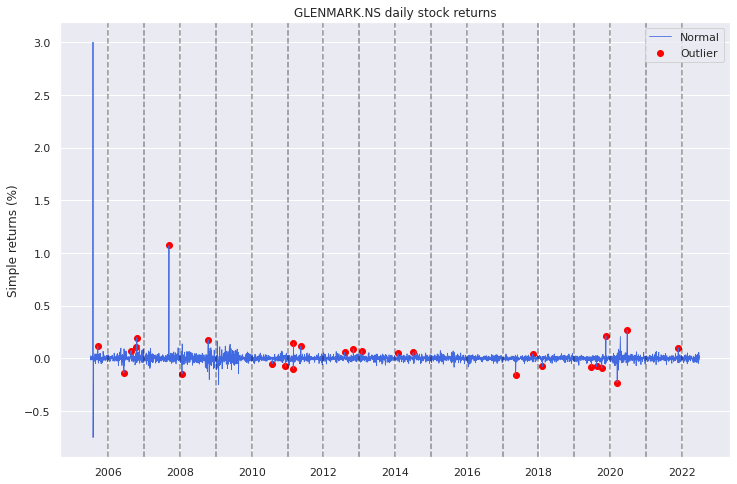

In [35]:
## Plotting the results together

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df1_all.index, df1_all['simple_returns'], color='royalblue', 
        linewidth=0.8, label="Normal")
ax.scatter(outliers.index, outliers['simple_returns'], color='red',
           label="Outlier")
ax.set(title=f"{ticker1} daily stock returns", 
          ylabel="Simple returns (%)")

for eachyear in range(start1.year,end1.year):
    ax.axvline(pd.to_datetime(str(eachyear)+'-12-31'), color='black', linestyle='--', alpha=0.4)

ax.legend(loc="best")

Points to note:
- Outliers are marked with red dots. However, note that when there are multiple large returns (in magnitude) occurring in the same period, only the first gets identified and marked.
- This is due to the increase in the the values of the rolling statistics when multiple adjacent outliers enter the window.
- We can vary the window length based on the underlying data frequency. Here, the moving averages calculated would give monthly means and standard deviations of returns.
- We can also use exponential moving averages (EMA) instead of simple moving averages if we want the rolling statistics to react faster to recent price changes.
- Here, we have only identified and tagged them. The next important step is how to deal with them (which is outside the scope of this session). I leave you to explore this topic as a self-study exercise. 

### Stylized facts of asset returns

[Cont (2001)](#cont2001) does a detailed review of the empirical features of asset prices in financial markets. He presents common statistical properties (***stylized facts***) that financial asset returns share across markets, instruments and time periods.

We should be cognizant of them when we develop models to explain and forecast asset prices. 
We now work with 40 years of S&P daily data to examine some of their characteristics.

In [36]:
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [37]:
end2 = datetime.date(2022, 6, 27)
start2 = datetime.date(1980, 1, 2)
ticker2 = "^GSPC"

In [38]:
df = yf.download(ticker2, start=start2, end=end2, progress=False)
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker2} data")

Downloaded 10712 rows and 6 columns of ^GSPC data


In [39]:
df2 = df.copy()

In [40]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")
# df2.to_csv("GLENMARK.NS.csv")
# df2 = pd.read_csv("GLENMARK.NS", index_col=0, parse_dates=True)
# df2 = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True, date_parser=mydateparser)

In [41]:
print(df2.head())
print(df2.tail())

            Open        High         Low       Close   Adj Close    Volume
Date                                                                      
1980-01-02   0.0  108.430000  105.290001  105.760002  105.760002  40610000
1980-01-03   0.0  106.080002  103.260002  105.220001  105.220001  50480000
1980-01-04   0.0  107.080002  105.089996  106.519997  106.519997  39130000
1980-01-07   0.0  107.800003  105.800003  106.809998  106.809998  44500000
1980-01-08   0.0  109.290001  106.290001  108.949997  108.949997  53390000
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-06-17  3665.899902  3707.709961  3636.870117  3674.840088  3674.840088   
2022-06-21  3715.310059  3779.649902  3715.310059  3764.790039  3764.790039   
2022-06-22  3733.889893  3801.790039  3717.689941  3759.889893  3759.889893   
2022-06-23  3774.709961  3802.580078  3743.520020  3795.729980  3795.729980   
2

In [42]:
df2.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)
df2.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
print(df2.tail())

              adj_close
Date                   
2022-06-17  3674.840088
2022-06-21  3764.790039
2022-06-22  3759.889893
2022-06-23  3795.729980
2022-06-24  3911.739990


In [43]:
df2['log_returns'] = np.log(df2['adj_close'] / df2['adj_close'].shift(1))

#### 1. Non-normal distribution of returns

A standard assumption in finance models (like the CAPM, the Black-Scholes option pricing model) is that returns are normally distributed.

Numerous studies have however shown empirically that this is not quite true.
Specifically,
- *Left skewed* : Gains and loss distributions are not symmetrical. 
    - We see longer left tails compared to the right tails
    - The large negative returns are higher in magnitude compared to the large positive returns. 
 
- *Excess kurtosis* : The distribution is fat at the tails and higher than normal peaks
    - Large (and small) returns occur more frequently than the distributional assumption of normality expects.



In [44]:
df2.head()

,adj_close,log_returns
Date,,
1980-01-02,105.760002,NaN
1980-01-03,105.220001,-0.005119
1980-01-04,106.519997,0.012279
1980-01-07,106.809998,0.002719
1980-01-08,108.949997,0.019838


In [45]:
df2.dropna(axis='rows', how='any', inplace=True)

In [46]:
## Generating a normal distribution curve with mean, variance, and range obtained from S&P 500 returns data

log_returns_range = np.linspace(min(df2['log_returns']), max(df2['log_returns']), num=1000)
μ = df2['log_returns'].mean()
σ = df2['log_returns'].std()
norm_pdf = scs.norm.pdf(log_returns_range, loc=μ, scale=σ)

Text(0.5, 1.0, 'Q-Q plot')

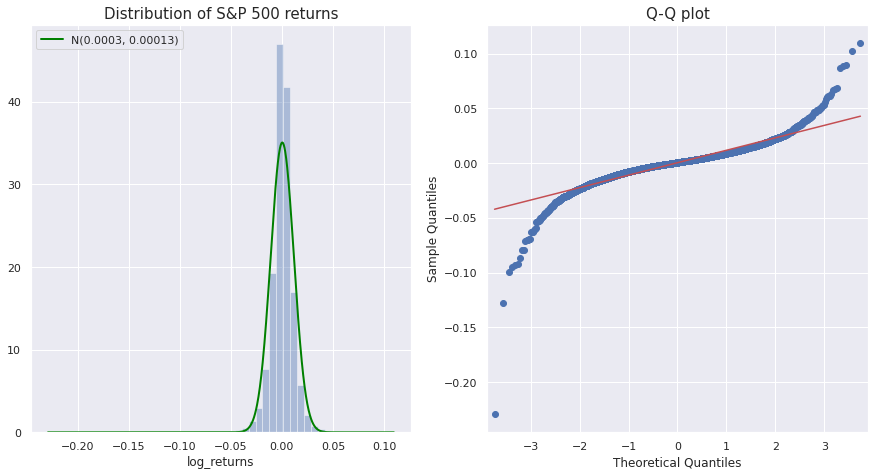

In [47]:
M = 1
N = 2

fig, ax = plt.subplots(M, N, figsize=(15, 7.5))

## histogram

sns.distplot(df2['log_returns'], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title("Distribution of S&P 500 returns", fontsize=15)
ax[0].plot(log_returns_range, norm_pdf, color='green', 
           linewidth=2, label=f"N({μ:.4f}, {σ**2:.5f})")
ax[0].legend(loc="best")

## Q-Q plot

qq_plot = sm.qqplot(df2['log_returns'], line='s', ax=ax[1])
## 's' is for standardized line to compare the plot with a normal distribution
ax[1].set_title("Q-Q plot", fontsize=15)

Points to note: *Distribution of S&P 500 returns*
- There is a visible difference in the shape of the returns histogram and the Gaussian (normal) distribution curve.
- The peak is higher in the histogram than the normal curve.
- The left tail of the distribution is longer.

Points to note: *Q-Q plot*

- Q-Q plots are used to compare empirical data to theoretical distributions. They are helpful in finding deviations at the tails.
- Here, we compare the distribution of the observed returns to a normal distribution.
- If we find that the dots are more or less on the red line, then it means that the data (in this case returns) is normally distributed.
- There is drift at both ends of the tails. This means that we have fatter tails violating the normality assumption.
- The size of the drift is higher on the left side of the plot than on the right side. This means that we observe large drops in returns but not equally large growths in returns.


In [48]:
## Running the Jarque-Bera test to check for normality of the sample data
## If the test statistic is very large and the p-value is less than 5%, we infer that the data is not
## normally distributed.

## For more details, check https://en.wikipedia.org/wiki/Jarque-Bera_test

from statsmodels.stats.stattools import jarque_bera
jb_test_stat, pvalue, _, _ = jarque_bera(df2['log_returns'])

In [49]:
jarque_bera?

Signature: jarque_bera(resids, axis=0)
Docstring:
The Jarque-Bera test of normality.

Parameters
----------
resids : array_like
    Data to test for normality. Usually regression model residuals that
    are mean 0.
axis : int, optional
    Axis to use if data has more than 1 dimension. Default is 0.

Returns
-------
JB : {float, ndarray}
    The Jarque-Bera test statistic.
JBpv : {float, ndarray}
    The pvalue of the test statistic.
skew : {float, ndarray}
    Estimated skewness of the data.
kurtosis : {float, ndarray}
    Estimated kurtosis of the data.

Notes
-----
Each output returned has 1 dimension fewer than data

The Jarque-Bera test statistic tests the null that the data is normally
distributed against an alternative that the data follow some other
distribution. The test statistic is based on two moments of the data,
the skewness, and the kurtosis, and has an asymptotic :math:`\chi^2_2`
distribution.

The test statistic is defined

.. math:: JB = n(S^2/6+(K-3)^2/24)

where n 

In [50]:
## Printing the summmary statistics of the S&P 500 returns data

print('------------------- Summary Statistics --------------------')
print(f'Range of dates: {min(df2.index.date)} to {max(df2.index.date)}')
print(f'Number of observations: {df2.shape[0]}')
print(f"Mean: {df2['log_returns'].mean():.4f}")
print(f"Median: {df2['log_returns'].median():.4f}")
print(f"Min: {df2['log_returns'].min():.4f}")
print(f"Max: {df2['log_returns'].max():.4f}")
print(f"Standard Deviation: {df2['log_returns'].std():.4f}")
print(f"Skewness: {df2['log_returns'].skew():.4f}")
print(f"Kurtosis: {df2['log_returns'].kurtosis():.4f}") 
print(f"Jarque-Bera statistic: {jb_test_stat:.2f} with p-value: {pvalue:.2f}")
print('-----------------------------------------------------------')

------------------- Summary Statistics --------------------
Range of dates: 1980-01-03 to 2022-06-24
Number of observations: 10711
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0114
Skewness: -1.1324
Kurtosis: 25.0412
Jarque-Bera statistic: 281866.53 with p-value: 0.00
-----------------------------------------------------------


Points to note:
- The mean is less than the median. Seen in negatively skewed distributions.
- Confirmed by the coefficient of skewness (which is negative).
- Excess kurtosis seen (anything above 0 is deemed as excess kurtosis. Normal distribution has a kurtosis of 0 when measured using the `pandas kurtosis` method) .
- The p-value of the Jarque-Bera test shows non-normality of the data.

#### 2. Volatility Clustering

> *When it rains, it pours*.

We observe from historical data that the volatility of the returns appears to change over time. Relatively tranquil periods in the market persist for a while. Similarly market turbulence like in 2008 and 2009 also cluster together.

In [51]:
# Simulating normally distributed returns for GLENMARK and S&P 500
sample1 = pd.DataFrame(np.random.normal(loc=df1['log_returns'].mean(), 
                                     scale=df1['log_returns'].std(), 
                                     size=df1['log_returns'].shape[0]), 
                    index = df1.index)

sample2 = pd.Series(np.random.normal(loc=df2['log_returns'].mean(), 
                                     scale=df2['log_returns'].std(), 
                                     size=df2['log_returns'].shape[0]), 
                    index = df2.index)


In [52]:
sample1.shape

(4190, 1)

In [53]:
sample2.shape

(10711,)

In [54]:
sample1.loc['July 2005', :]

,0
Date,
2005-07-01,-0.008471
2005-07-04,-0.005060
2005-07-05,0.045469
2005-07-06,0.023702
2005-07-07,0.009398
2005-07-08,0.010005
2005-07-11,-0.042454
2005-07-12,-0.017422
2005-07-13,-0.000994


Text(0.5, 1.0, 'Simulated returns')

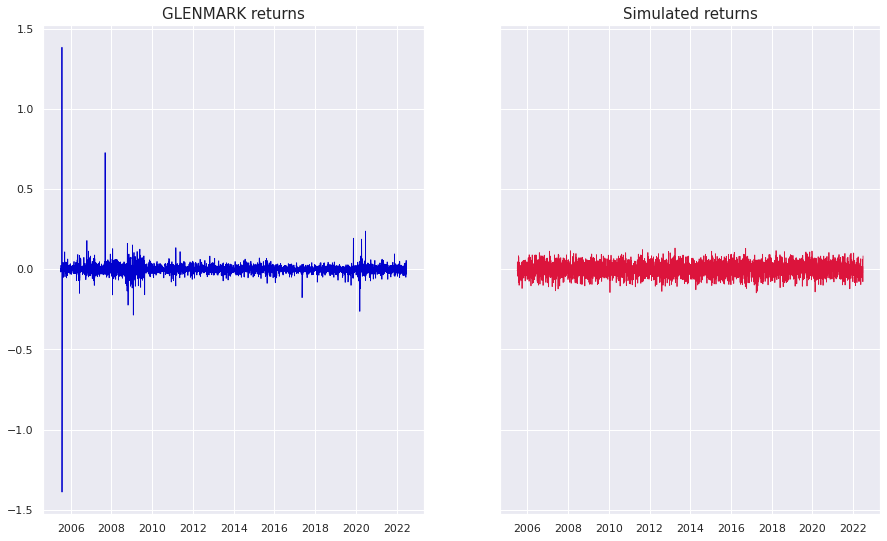

In [55]:
## Plotting the daily returns of GLENMARK and simulated data with same mean/sd side by side 

x = df1.index
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9), sharey=True)
ax1.plot(x, df1['log_returns'], linewidth=0.8, color='mediumblue')
ax1.set_title("GLENMARK returns", fontsize=15)
ax2.plot(sample1, linewidth=0.8, color='crimson')
ax2.set_title("Simulated returns", fontsize=15)

Text(0.5, 1.0, 'Simulated returns')

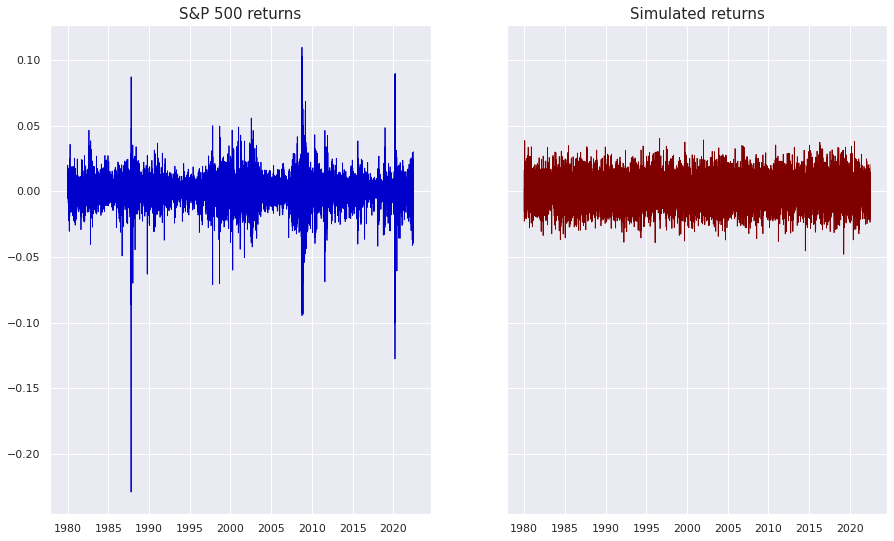

In [56]:
## Plotting the daily returns of S&P 500 and simulated data with same mean/sd side by side 

x = df2.index
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9), sharey=True)
ax1.plot(x, df2['log_returns'], linewidth=0.8, color='mediumblue')
ax1.set_title("S&P 500 returns", fontsize=15)
ax2.plot(x, sample2, linewidth=0.8, color='maroon')
ax2.set_title("Simulated returns", fontsize=15)

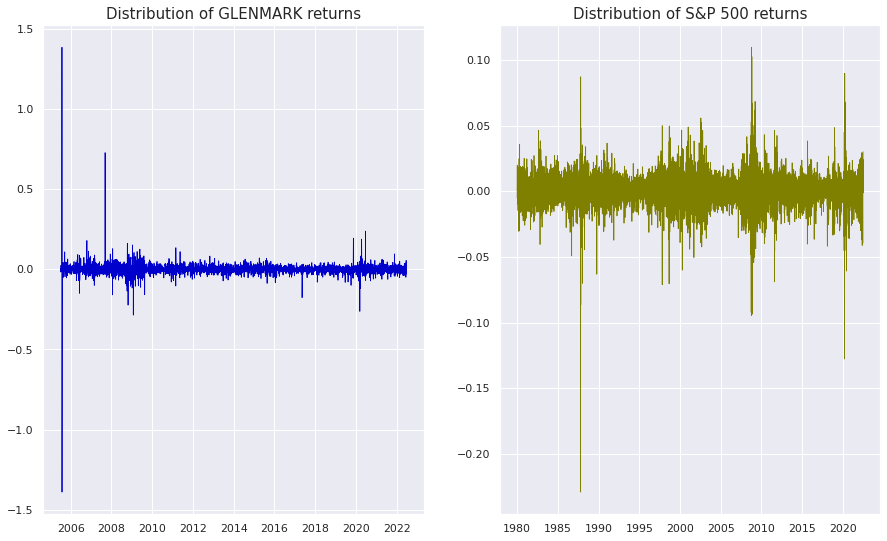

In [58]:
## Plotting the daily returns of GLENMARK and S&P 500 side by side 

fig, ax = plt.subplots(1, 2, figsize=(15, 9))

ax[0].set_title("Distribution of GLENMARK returns", fontsize=15)
ax[0].plot(df1['log_returns'], linewidth=0.8, color='mediumblue')

ax[1].set_title("Distribution of S&P 500 returns", fontsize=15)
ax[1].plot(df2['log_returns'], linewidth=0.8, color='olive')

Points to note:
- For Glenmark, between 2008 and 2010, there's a higher swing of positive and negative returns. Notice how it's quite different from between 2016 and 2018.
- Similar waves of high and low volatility periods seen in S&P returns

#### 3. Absence of autocorrelations

Autocorrelation measures the degree of similarity between a time series process and a delayed copy of itself. We measure it at different lags to unearth any patterns that repeat consistently.

Studies have shown that there is little autocorrelation observed in asset returns except for short time scales (of the order of 15 to 20 minutes).


In [60]:
n_lags = 50
significance_level = 0.05

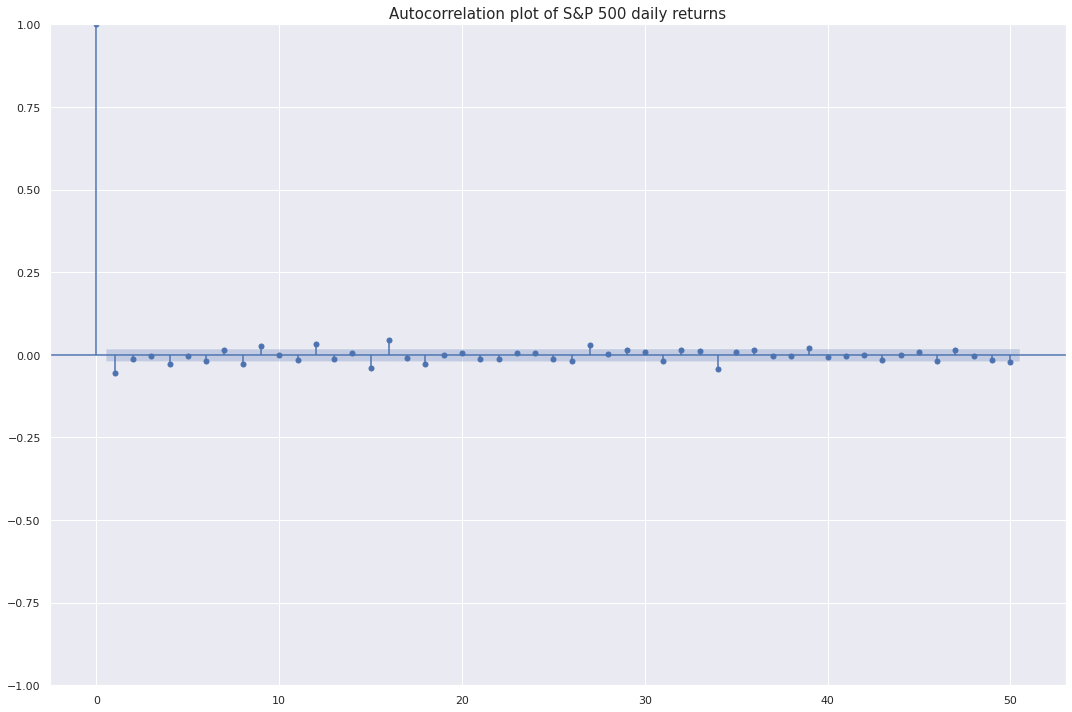

In [63]:
M = 15
N = 10

fig, ax = plt.subplots(figsize=(M, N))
smt.graphics.plot_acf(df2['log_returns'], lags=n_lags, 
                                 alpha=significance_level, ax=ax)
ax.set_title("Autocorrelation plot of S&P 500 daily returns", fontsize=15)
plt.tight_layout()
plt.show()

Points to note:
- We do not look at autocorrelation at lag 0.
- A few values that lie outside the blue confidence interval are statistically significant
- Visually, it appears that there is very little autocorrelation in the returns


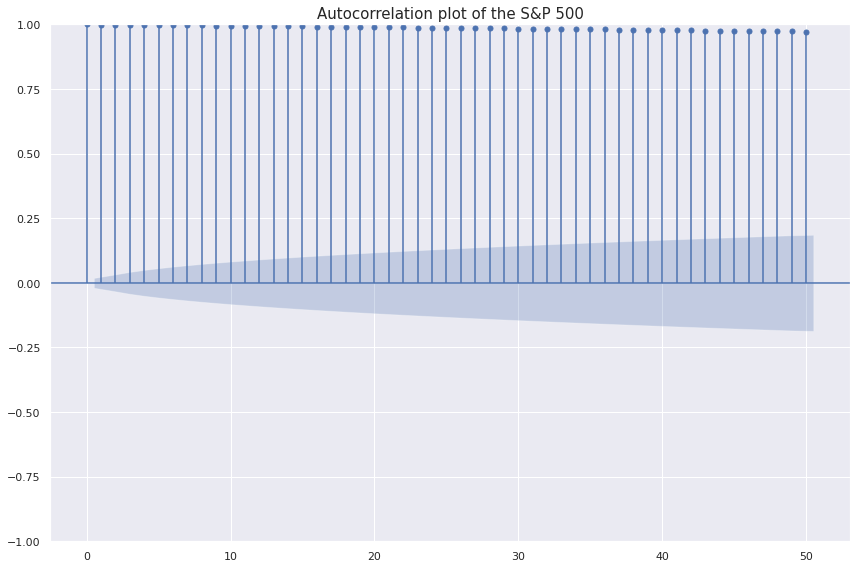

In [65]:
M = 12
N = 8

fig, ax = plt.subplots(figsize=(M, N))
smt.graphics.plot_acf(df2['adj_close'], lags=n_lags, 
                                 alpha=significance_level, ax=ax)
ax.set_title("Autocorrelation plot of the S&P 500", fontsize=15)
plt.tight_layout()
plt.show()

#### 4. Slow decay of autocorrelations in absolute and squared returns

We follow the same procedure as above but this time we run it on absolute returns and squared returns. We can then plot the autocorrelation function (ACF) at different lags.

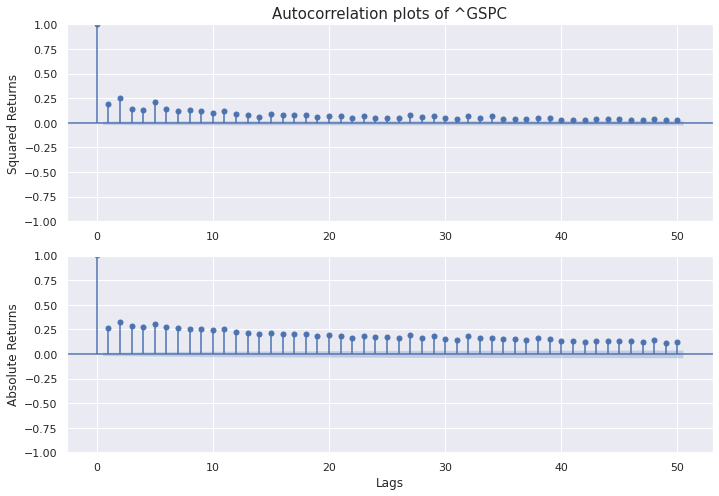

In [66]:
M, N = 10, 7
fig, ax = plt.subplots(2, 1, figsize=(M, N))
smt.graphics.plot_acf(df2['log_returns'] ** 2, lags=n_lags, 
                      alpha=significance_level, ax=ax[0])
ax[0].set_title(f"Autocorrelation plots of {ticker2}", fontsize=15)
ax[0].set(ylabel="Squared Returns")

smt.graphics.plot_acf(np.abs(df2['log_returns']), lags=n_lags, 
                      alpha=significance_level, ax=ax[1])
ax[1].set(title="", xlabel='Lags', ylabel="Absolute Returns")

plt.tight_layout()
plt.show()

Points to note:
- There is is a slow and uneven decay of the ACF plot.
- The ACF of the squared returns decrease faster than that of the absolute returns.
- There is significant autocorrelation as seen in the literature.

#### 5. Leverage effect

There is a negative correlation between the volatility (most measures) of an asset and its returns. i.e. When prices go up, there is less volatility in the asset returns and vice-versa.

We verify it using two different methods. 

- In the first one, we measure volatility as the standard deviation of the asset returns. 
- In the second one, we will use the VIX index (often called the *fear index* of Wall Street), a popular market metric that tracks expectations of volatility.


In [67]:
df1['ma_std_252'] = df1['log_returns'].rolling(window=252).std()
df1['ma_std_21'] = df1['log_returns'].rolling(window=21).std()

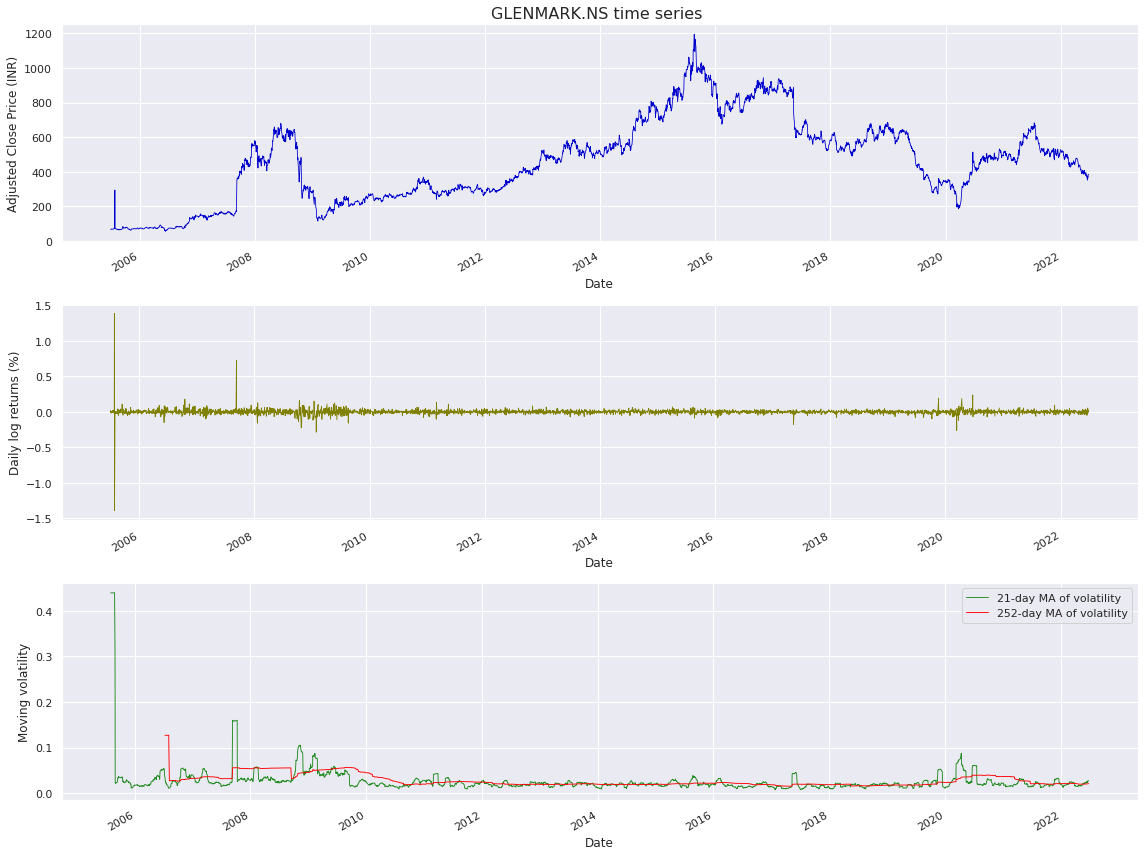

In [68]:
## Method I

M, N = 16, 12
fig, ax = plt.subplots(3, 1, figsize=(M, N))

df1['adj_close'].plot(ax=ax[0], linewidth=0.8, color='mediumblue')
ax[0].set_title(f"{ticker1} time series ", fontsize=16)
ax[0].set(ylabel="Adjusted Close Price (INR)")


df1['log_returns'].plot(ax=ax[1], linewidth=0.8, color='olive')
ax[1].set(ylabel="Daily log returns (%)")

df1['ma_std_21'].plot(ax=ax[2], color='forestgreen', linewidth = 0.9, label="21-day MA of volatility")
df1['ma_std_252'].plot(ax=ax[2], color='red', linewidth = 0.9, label="252-day MA of volatility")
ax[2].set(xlabel="Date", ylabel="Moving volatility")
ax[2].legend()

plt.tight_layout()

Points to note:
- Leverage effect is visible. There seems to be a pattern of prices going up and volatility being low in those phases and vice-versa.

In [69]:
## Method II

start3 = start2
end3 = end2
ticker3 = "^VIX"

df = yf.download([ticker2, ticker3], start=start3, end=end3, progress=True)

[*********************100%***********************]  2 of 2 completed


In [70]:
df.shape

(10712, 12)

In [71]:
df.tail()

Adj Close                   Close                    High  \
                  ^GSPC       ^VIX        ^GSPC       ^VIX        ^GSPC   
Date                                                                      
2022-06-17  3674.840088  31.129999  3674.840088  31.129999  3707.709961   
2022-06-21  3764.790039  30.190001  3764.790039  30.190001  3779.649902   
2022-06-22  3759.889893  28.950001  3759.889893  28.950001  3801.790039   
2022-06-23  3795.729980  29.049999  3795.729980  29.049999  3802.580078   
2022-06-24  3911.739990  27.230000  3911.739990  27.230000  3913.649902   

                               Low                    Open             \
                 ^VIX        ^GSPC       ^VIX        ^GSPC       ^VIX   
Date                                                                    
2022-06-17  33.310001  3636.870117  30.469999  3665.899902  32.840000   
2022-06-21  30.650000  3715.310059  29.330000  3715.310059  30.629999   
2022-06-22  31.570000  3717.689941  28.780001  3733.889893  31.450001   
2022-06-23  29.770000  3743.520020  28.740000  3774.709961  29.290001   
2022-06-24  29.719999  3821.750000  26.830000  3821.750000  29.070000   

                Volume       
                 ^GSPC ^VIX  
Date                         
2022-06-17  6954110000  0.0  
2022-06-21  4124600000  0.0  
2022-06-22  4342270000  0.0  
2022-06-23  4078100000  0.0  
2022-06-24  6742870000  0.0

In [72]:
df.head()

Adj Close            Close             High              Low  \
                 ^GSPC ^VIX       ^GSPC ^VIX       ^GSPC ^VIX       ^GSPC   
Date                                                                        
1980-01-02  105.760002  NaN  105.760002  NaN  108.430000  NaN  105.290001   
1980-01-03  105.220001  NaN  105.220001  NaN  106.080002  NaN  103.260002   
1980-01-04  106.519997  NaN  106.519997  NaN  107.080002  NaN  105.089996   
1980-01-07  106.809998  NaN  106.809998  NaN  107.800003  NaN  105.800003   
1980-01-08  108.949997  NaN  108.949997  NaN  109.290001  NaN  106.290001   

                 Open         Volume       
           ^VIX ^GSPC ^VIX     ^GSPC ^VIX  
Date                                       
1980-01-02  NaN   0.0  NaN  40610000  NaN  
1980-01-03  NaN   0.0  NaN  50480000  NaN  
1980-01-04  NaN   0.0  NaN  39130000  NaN  
1980-01-07  NaN   0.0  NaN  44500000  NaN  
1980-01-08  NaN   0.0  NaN  53390000  NaN

In [73]:
df3 = df.copy()

In [74]:
df3 = df3[['Adj Close']]

In [75]:
df3.columns

MultiIndex([('Adj Close', '^GSPC'),
            ('Adj Close',  '^VIX')],
           )

In [76]:
df3.columns = df3.columns.droplevel(0)

In [77]:
df3.columns

Index(['^GSPC', '^VIX'], dtype='object')

In [78]:
df3.rename(columns={"^GSPC": "sp500", "^VIX": "vix"}, inplace=True)

In [79]:
df3.tail()

,sp500,vix
Date,,
2022-06-17,3674.840088,31.129999
2022-06-21,3764.790039,30.190001
2022-06-22,3759.889893,28.950001
2022-06-23,3795.729980,29.049999
2022-06-24,3911.739990,27.230000


In [80]:
df3.head()

,sp500,vix
Date,,
1980-01-02,105.760002,NaN
1980-01-03,105.220001,NaN
1980-01-04,106.519997,NaN
1980-01-07,106.809998,NaN
1980-01-08,108.949997,NaN


In [81]:
df3["log_returns"] = np.log(df3['sp500'] / df3['sp500'].shift(1))
df3["vol_returns"] = np.log(df3['vix'] / df3['vix'].shift(1))

In [82]:
df3.dropna(how="any", axis="rows", inplace=True)

In [83]:
df3.head()

,sp500,vix,log_returns,vol_returns
Date,,,,
1990-01-03,358.760010,18.190001,-0.002589,0.053640
1990-01-04,355.670013,19.219999,-0.008650,0.055079
1990-01-05,352.200012,20.110001,-0.009804,0.045266
1990-01-08,353.790009,20.260000,0.004504,0.007431
1990-01-09,349.619995,22.200001,-0.011857,0.091444


In [84]:
df3.tail()

,sp500,vix,log_returns,vol_returns
Date,,,,
2022-06-17,3674.840088,31.129999,0.002198,-0.056819
2022-06-21,3764.790039,30.190001,0.024182,-0.030661
2022-06-22,3759.889893,28.950001,-0.001302,-0.041941
2022-06-23,3795.729980,29.049999,0.009487,0.003448
2022-06-24,3911.739990,27.230000,0.030106,-0.064699


In [85]:
df3.shape

(8183, 4)

In [86]:
corr_coeff = df3['log_returns'].corr(df3['vol_returns'])

In [87]:
corr_coeff

-0.710565218753724

[Text(0.5, 1.0, 'S&P 500 vs. VIX (ρ = -0.711)'),
 Text(0.5, 0, 'S&P 500 log returns'),
 Text(0, 0.5, 'VIX log returns')]

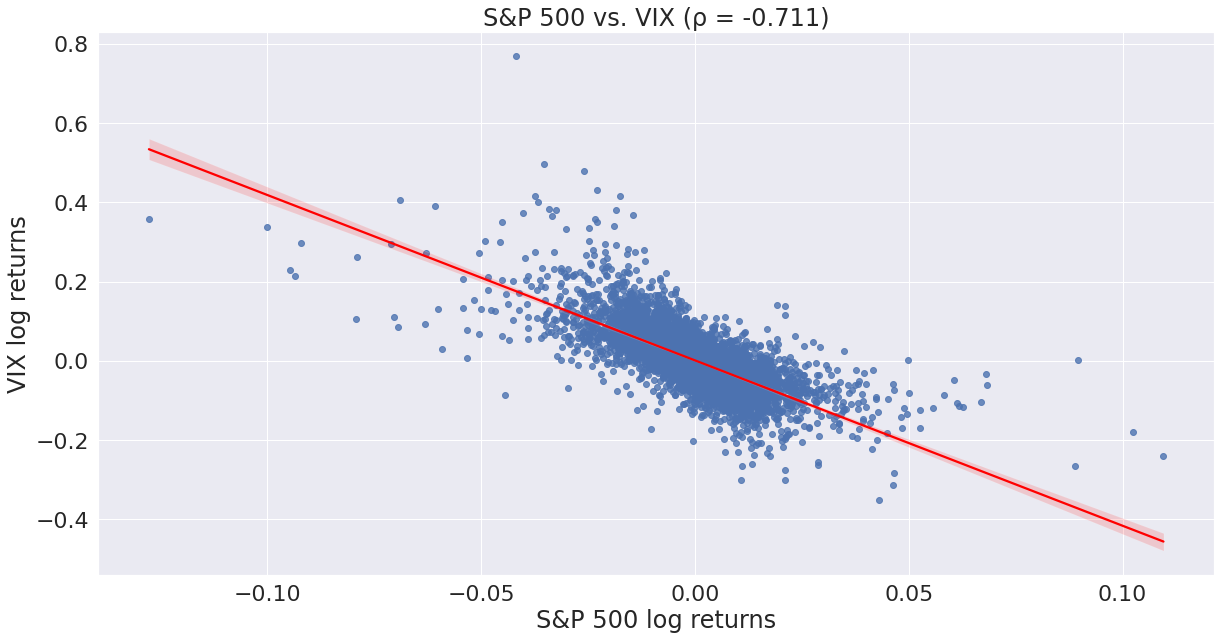

In [88]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
ax = sns.regplot(x='log_returns', y='vol_returns', data=df3, 
                 line_kws={'color':'red'})
ax.set(title=f"S&P 500 vs. VIX (ρ = {corr_coeff:.3f})", 
       xlabel="S&P 500 log returns", ylabel="VIX log returns")

Points to note:
- High negative value of correlation coefficient.
- Slope of the regression line which is also negative.

<a id = 'convert'></a>

### Anatomy of a time series process

Time series processes have a wide variety of patterns. So it is helpful to consider them as a combination of *systematic* and *unsystematic* components.

- **Systematic**: These are recurring in nature and so can be described and modeled.
- **Non-systematic**: These are random in nature and so cannot be directly modeled.

The systematic components can be further split into *level*, *trend*, and *seasonality* whereas the non-systematic component is referred to as *noise*.

- **Level**: The average value of the process.
- **Trend**: The direction and rate of change of the process. The slope is a good proxy for it.
- **Seasonality**: Deviations in the process caused by recurring short-term cycles.
- **Noise**: The random variation observed in the process.

Another useful abstraction while analyzing time series processes is to see them as either an *additive* or a *multiplicative* blend of the four constituent parts mentioned.

**Additive model**: The process $X(t)$ has the form
$$X(t) = Level + Trend + Seasonality + Noise$$

We use an additive model when the underlying process under examination has the following characteristics.
- The process changes remain constant over time (i.e. they are linear). So the trend line would be straight.
- It shows linear seasonality. That is to say the frequency and amplitude (i.e. the width and the height) of the cycles remain constant over time.



**Multiplicative model**: The process $X(t)$ has the form
$$X(t) = Level \times Trend \times Seasonality \times Noise$$

We use a multiplicative model when the underlying process under examination has the following characteristics.
- The process changes vary over time (i.e. they are non-linear in nature).
- An exponential or quadratic or higher order polynomial process is multiplicative. So the trend-line would be curved, not straight. 
- It shows non-linear seasonality. That is to say the frequency and amplitude (i.e. the width and the height) of the cycles vary over time.

In the (harsh) real world, we often encounter non-linear or even mixed processes and therefore have to work with the multiplicative model as our prototype. But we prefer to work with linear processes as they are easier to use. So we transform the original process into a linear one. A commonly used trick is applying a log transformation.

<a id = 'references'></a>
#### References
<a id = 'bnshephard'></a>
<a id = 'arch'></a>
<a id = 'others'></a>
<a id = 'eryk'></a>
<a id = 'cont2001'></a>

1. Barndorff‐Nielsen, O. E., & Shephard, N. (2002). Econometric analysis of realized volatility and its use in estimating stochastic volatility models. *Journal of the Royal Statistical Society: Series B (Statistical Methodology)*, 64(2), 253-280.
2. Cochrane, John H. "Time series for macroeconomics and finance." Manuscript, University of Chicago (2005).
3. Cont, R.(2001). Empirical properties of asset returns: stylized facts and statistical issues.
4. https://towardsdatascience.com/@eryk.lewinson
5. https://pyflux.readthedocs.io/en/latest/getting_started.html
6. https://tomaugspurger.github.io/modern-7-timeseries
7. https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html
6. Tsay, Ruey S. Analysis of financial time series. Vol. 543. John Wiley & Sons, 2005.
7. Campbell, John Y., Andrew Wen-Chuan Lo, and Craig MacKinlay. The Econometrics of Financial Markets. Vol. 2. Princeton, NJ: princeton University press, 1997.